In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
data = pd.read_csv('weather.csv', index_col='Day')

# Getting unique values
outlook_data = data['Outlook'].unique()
wind_data = data['Wind'].unique()
labels = data['Decision'].unique()

# making an array for encoding string data to int data for decision tree classifier
string_data = np.concatenate((outlook_data, wind_data, labels))
le = preprocessing.LabelEncoder()
le.fit(string_data)
int_transformation = le.transform(string_data)
dct = dict(zip(string_data, int_transformation))

# Function to map encoded integers to string
def int_to_str(x):
    return dct[x]
    
int_data = data[['Outlook', 'Wind', 'Decision']].applymap(int_to_str)

In [4]:
data = data.join(int_data, how='right', lsuffix='l_', rsuffix='',)
data[['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision']]

,Outlook,Temp,Humidity,Wind,Decision
Day,,,,,
1,4,85,85,5,0
2,4,80,90,3,0
3,1,83,78,5,6
4,2,70,96,5,6
5,2,68,80,5,6
6,2,65,70,3,0
7,1,64,65,3,6
8,4,72,95,5,0
9,4,69,70,5,6


In [5]:
data[['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision']].corr()



,Outlook,Temp,Humidity,Wind,Decision
Outlook,1.000000,0.187552,0.184397,0.066667,-0.464758
Temp,0.187552,1.000000,0.273245,0.328866,-0.121064
Humidity,0.184397,0.273245,1.000000,0.254415,-0.291954
Wind,0.066667,0.328866,0.254415,1.000000,0.258199
Decision,-0.464758,-0.121064,-0.291954,0.258199,1.000000


In [6]:
data[['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision']].cov()

,Outlook,Temp,Humidity,Wind,Decision
Outlook,1.648352,1.582418,2.329670,0.087912,-1.780220
Temp,1.582418,43.186813,17.670330,2.219780,-2.373626
Humidity,2.329670,17.670330,96.835165,2.571429,-8.571429
Wind,0.087912,2.219780,2.571429,1.054945,0.791209
Decision,-1.780220,-2.373626,-8.571429,0.791209,8.901099


In [7]:
features = data[['Outlook', 'Wind', 'Humidity']]
labels = data['Decision']

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(features, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
# Printing the Accuracy
acc = clf.score(features, labels)
acc

0.8571428571428571

In [10]:
# Predicting from trained model
print("Decision: {}".format(list(le.inverse_transform(clf.predict(np.array(features.iloc[0,:]).reshape(1,-1))))))

Decision: ['No']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
# Our mapping
dct

{'No': 0,
 'Overcast': 1,
 'Rain': 2,
 'Strong': 3,
 'Sunny': 4,
 'Weak': 5,
 'Yes': 6}

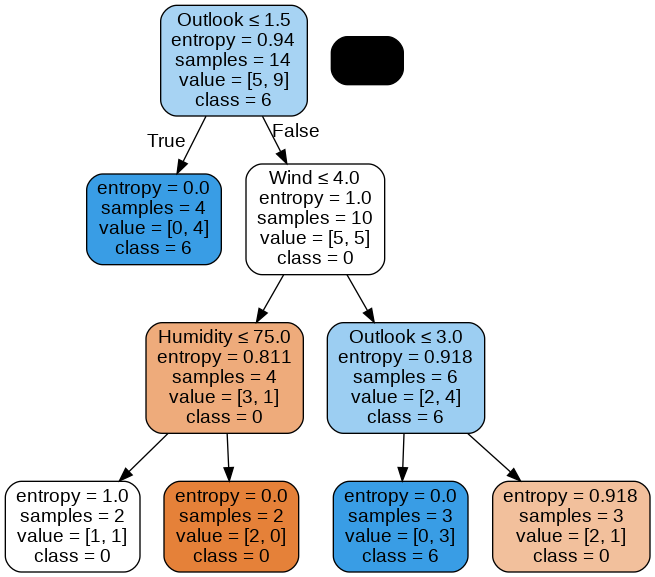

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Outlook', 'Wind', 'Humidity'],class_names=['0','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

In [13]:
print("Decision {}".format(list(le.inverse_transform(clf.predict(np.array([2,84, 5]).reshape(1,-1))))))

Decision ['Yes']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
